In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.pyplot import text
plt.style.use('dark_background')

### Algorithm
The algorithm uses the same code written in exercise 9 to build a population and make it evolve with the aim of minimizing the path. The difference with respect to the genetic algorithm is that in this case the population consists of only one individual who undergoes mutations.
The algorithm simulates at 14 temperatures in the $ (0.1, 4) $ range. For each simulation temperature $ 10 ^ 6 $ moves are performed. One move consists in proposing a mutation of the individual, which is automatically accepted if his fitness improves, otherwise the probability of acceptance is determined by a Boltzmann distribution $ p = e^ {-\frac{fit_{new}-fit_{old}}{T}} $. By gradually lowering the simulation temperature, the likelihood of accepting bad mutations decreases more and more, so I expect chromosome fitness to get better and better.

The mutations that the chromosome can undergo are the same as in exercise 9 and occur with probability of $ 50 \% $:
1. An exchange between two randomly selected genes
2. An exchange between two adjacent genes
3. The shift of a part of the chromosome
4. A permutation between random-sized groups of adjacent cities
5. The reversal of the order of a random number of adjacent cities

Compared to exercise 9, the fitness of the paths was calculated using a $ L ^ {(2)} $ norm. This does not imply differences in optimization, the path lengths will simply be rescaled.

In [3]:
steps = 1e4
n_print = 10
temps = np.genfromtxt("temperatures.csv")
colors = ['red', 'orangered', 'coral', 'orange', 'gold', 'yellow', 'greenyellow', 'limegreen', 'mediumspringgreen', 'aquamarine', 'lightskyblue', 'dodgerblue', 'blue', 'navy']

# Esercizio 10.1 - <span style="color:blue"> Traveling salesman problem w/ simulated annealing </span>

In [4]:
# get position of the 32 cities in a square

cities = 32

positions = np.genfromtxt("pos_circle.csv", delimiter=',', dtype=float, skip_header=1)
pos_x = positions[:,0]
pos_y = positions[:,1]

## Part 1: <span style="color:indigo"> Cities disposed on a circle <span>


Starting path length =  38.0954
Best path length =  6.23496 



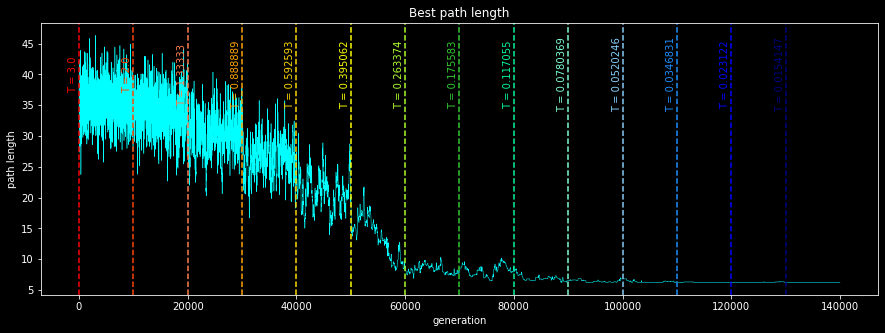

In [7]:
# plot evolution of length of the best path (fitness of the first cromo in the ordered population) 
#   as a function of #generations computed

fig, ax = plt.subplots(1, 1, figsize=(15,5))

cost = np.genfromtxt("cost_circle.csv", dtype=float, delimiter=',')

ax.plot(np.arange(len(cost))*n_print, cost, label='best path length', linewidth=0.5,color='#00FFFF')
for i in range(len(temps)):
    ax.axvline(i*steps, color=colors[i], linestyle='dashed')
    text(i*steps-2000, 40, "T = "+str(temps[i]), rotation=90, verticalalignment='center', color=colors[i])
ax.set_xlabel('generation')
ax.set_ylabel('path length')
ax.set_title('Best path length')

print("\nStarting path length = ", cost[0])
print("Best path length = ", cost[-1], '\n')

    The graph shows the cost of the walk as a function of the simulation steps performed. Simulation temperatures are also reported. For each temperature, 1 million moves are performed. I have not calculated the length of the path after each move to avoid producing a file of 14 million lines, the code calculates an average of the cost of the path every 2000 moves. I chose this approach so as not to "throw away" many intermediate configurations, which would happen when printing the cost of a single chromosome every 2000 for example.


Starting path = [ 1 31 29 24 13  8 27 30 32 19 26  4 28 11  9  7  3 25 21 14 12  2 22  5
 16 23 20 18 10  6 17 15]
Optimal path = [ 1  2 14 16 20 21 17 24 25  5 32 15  3 23  7 19 12  9 10 30 29 22 13 31
 18  6  4 28  8 11 26 27] 



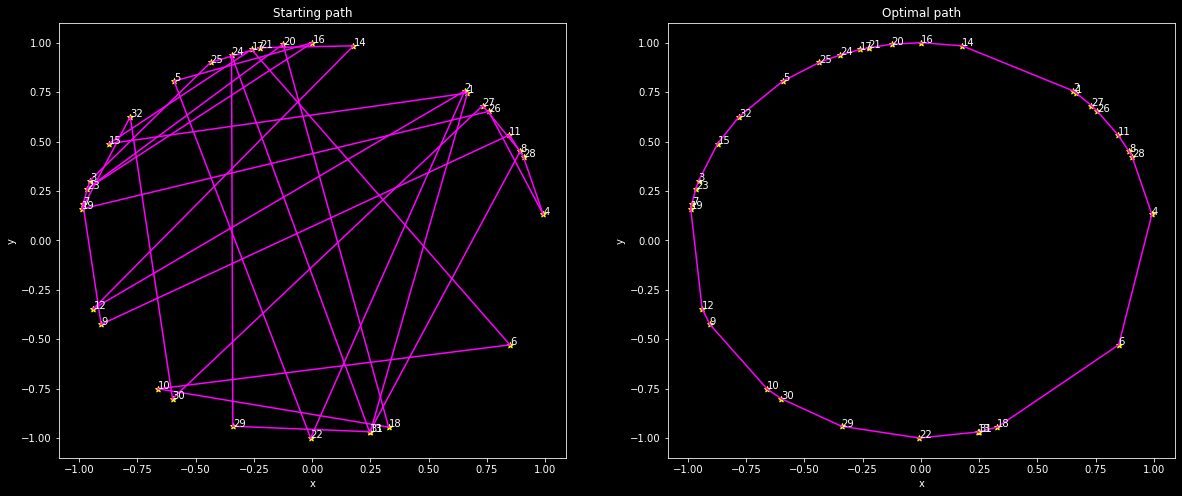

In [9]:
# plot the best path

paths = np.genfromtxt("best_cromo_circle.csv", dtype=int, delimiter=',')

fig, axx = plt.subplots(1, 2, figsize=(20,8))
    
for ind in [0,1]:
    ax = axx[ind]
    ax.scatter(x=pos_x, y=pos_y, color='yellow', marker='*')
    for i in range(cities):
        ax.annotate(str(i+1), positions[i])
    path = paths[ind]
    for i in range(cities):
        x1 = pos_x[path[i-cities*int(i/cities)]-1]
        y1 = pos_y[path[i-cities*int(i/cities)]-1]
        x2 = pos_x[path[i+1-cities*int((i+1)/cities)]-1]
        y2 = pos_y[path[i+1-cities*int((i+1)/cities)]-1]
        ax.plot([x1, x2], [y1, y2], color='fuchsia')
    if ind == 0:
        title = 'Starting path'
    else:
        title = 'Optimal path'
    ax.set_title(title)
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    
print("\nStarting path =", paths[0])
print("Optimal path =", paths[1], '\n')

    The graphs compare the initial and the optimized path. It is evident the excellent functioning of the code, which is able to effectively identify the shortest path on the circumference.

## Part 2: <span style="color:indigo"> Cities inside a 1x1 square <span>

In [10]:
# get position of the 32 cities in a square

cities = 32

positions = np.genfromtxt("pos_square.csv", delimiter=',', dtype=float, skip_header=1)
pos_x = positions[:,0]
pos_y = positions[:,1]


Starting path length =  36.6341
Best path length =  7.72504 



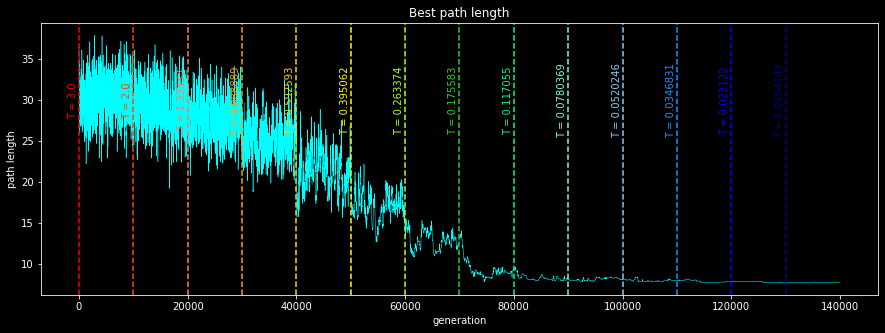

In [12]:
# plot evolution of length of the best path (fitness of the first cromo in the ordered population) 
#   as a function of #generations computed

fig, ax = plt.subplots(1, 1, figsize=(15,5))

cost = np.genfromtxt("cost_square.csv", dtype=float, delimiter=',')

ax.plot(np.arange(len(cost))*n_print, cost, label='best path length', linewidth=0.5,color='#00FFFF')
for i in range(len(temps)):
    ax.axvline(i*steps, color=colors[i], linestyle='dashed')
    text(i*steps-2000, 30, "T = "+str(temps[i]), rotation=90, verticalalignment='center', color=colors[i])
ax.set_xlabel('generation')
ax.set_ylabel('path length')
ax.set_title('Best path length')

print("\nStarting path length = ", cost[0])
print("Best path length = ", cost[-1], '\n')

    The graph shows the cost of the walk as a function of the simulation steps performed. Simulation temperatures are also reported. For each temperature, 1 million moves are performed. I have not calculated the length of the path after each move to avoid producing a file of 14 million lines, the code calculates an average of the cost of the path every 2000 moves. I chose this approach so as not to "throw away" many intermediate configurations, which would happen when printing the cost of a single chromosome every 2000 for example.


Starting path = [ 1 26  5 32 27 12 31 25 20 11 28 15 10 17  3 16 21 14 24 18 19 29  7  8
  6 22 30 23  2  4 13  9]
Optimal path = [ 1 14 31 30 29 13  2 22  4  8 10 12 17  7 25 21 19 16 26 15  5 27 24 23
  3  9 11 18  6 28 20 32] 



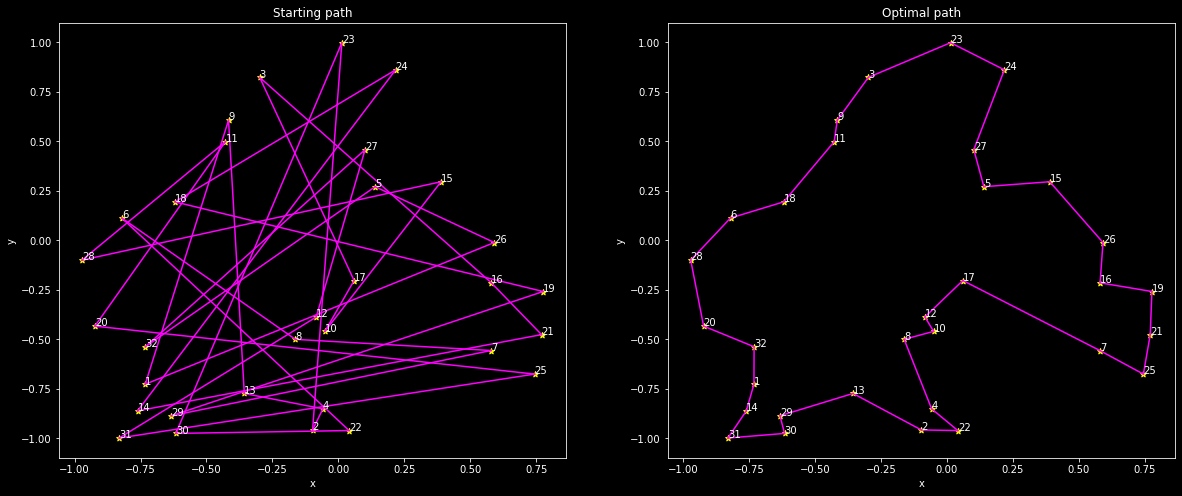

In [13]:
# plot the best path

paths = np.genfromtxt("best_cromo_square.csv", dtype=int, delimiter=',')

fig, axx = plt.subplots(1, 2, figsize=(20,8))
    
for ind in [0,1]:
    ax = axx[ind]
    ax.scatter(x=pos_x, y=pos_y, color='yellow', marker='*')
    for i in range(cities):
        ax.annotate(str(i+1), positions[i])
    path = paths[ind]
    for i in range(cities):
        x1 = pos_x[path[i-cities*int(i/cities)]-1]
        y1 = pos_y[path[i-cities*int(i/cities)]-1]
        x2 = pos_x[path[i+1-cities*int((i+1)/cities)]-1]
        y2 = pos_y[path[i+1-cities*int((i+1)/cities)]-1]
        ax.plot([x1, x2], [y1, y2], color='fuchsia')
    if ind == 0:
        title = 'Starting path'
    else:
        title = 'Optimal path'
    ax.set_title(title)
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    
print("\nStarting path =", paths[0])
print("Optimal path =", paths[1], '\n')

    The graphs compare the initial and the optimized path. It is evident the excellent functioning of the code, which is able to effectively identify the shortest path on the circumference.

# Esercizio 10.2 - <span style="color:blue"> Parallelizing the genetic algorithm </span>

### Algorithm

The genetic algorithm used is the same as the one in exercise 9. This time, however, it is performed in parallel on 4 cores, and the cores periodically exchange the best chromosomes. This exchange of information between different continents should improve performance.

Each continent has a population of 300 individuals, which is evolved over 1000 generations. Every 25 runs, each node sends its 10 best chromosomes to the other processes and receives 10 * n_cores chromosomes from the others. These received chromosomes are replaced at the worst part of the population.

Obviously all the nodes work on the same city layout.

In [14]:
# get position of the 32 cities in a square

cities = 32

positions = np.genfromtxt("2/pos_square.csv", delimiter=',', dtype=float, skip_header=1)
pos_x = positions[:,0]
pos_y = positions[:,1]

Best path length for core 0 = 7.72504
Best path length for core 1 = 7.72504
Best path length for core 2 = 7.72504
Best path length for core 3 = 7.72504
Best path length for single core = 7.72504


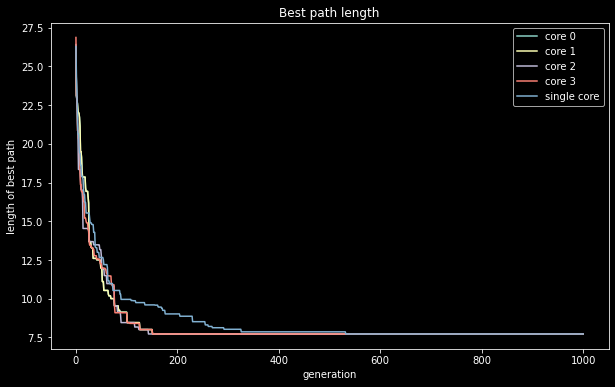

In [16]:
# plot evolution of length of the best path (fitness of the first cromo in the ordered population) 
#   as a function of #generations computed

cores = [0, 1, 2, 3, 4]    # core = 4 is for the single core run

fig, ax = plt.subplots(1, 1, figsize=(10,6))
for core in cores:
    cost = np.genfromtxt("cost"+str(core)+".csv", dtype=float, delimiter=',')[:-1]
    if core == 4:
        label = "single core"
    else:
        label = f"core {core}"
    ax.plot(np.arange(len(cost)), cost, label=label)
    print("Best path length for",label,"=",cost[-1])
ax.set_xlabel('generation')
ax.set_ylabel('length of best path')
ax.set_title('Best path length')
ax.legend()


 4 cores - process 0 
	optimal path = [ 1 14 31 30 29 13  2 22  4  8 10 12 17  7 25 21 19 16 26 15  5 27 24 23
  3  9 11 18  6 28 20 32]

 4 cores - process 1 
	optimal path = [ 1 14 31 30 29 13  2 22  4  8 10 12 17  7 25 21 19 16 26 15  5 27 24 23
  3  9 11 18  6 28 20 32]

 4 cores - process 2 
	optimal path = [ 1 14 31 30 29 13  2 22  4  8 10 12 17  7 25 21 19 16 26 15  5 27 24 23
  3  9 11 18  6 28 20 32]

 4 cores - process 3 
	optimal path = [ 1 14 31 30 29 13  2 22  4  8 10 12 17  7 25 21 19 16 26 15  5 27 24 23
  3  9 11 18  6 28 20 32]

 Single core process 
	optimal path = [ 1 14 31 30 29 13  2 22  4  8 10 12 17  7 25 21 19 16 26 15  5 27 24 23
  3  9 11 18  6 28 20 32]


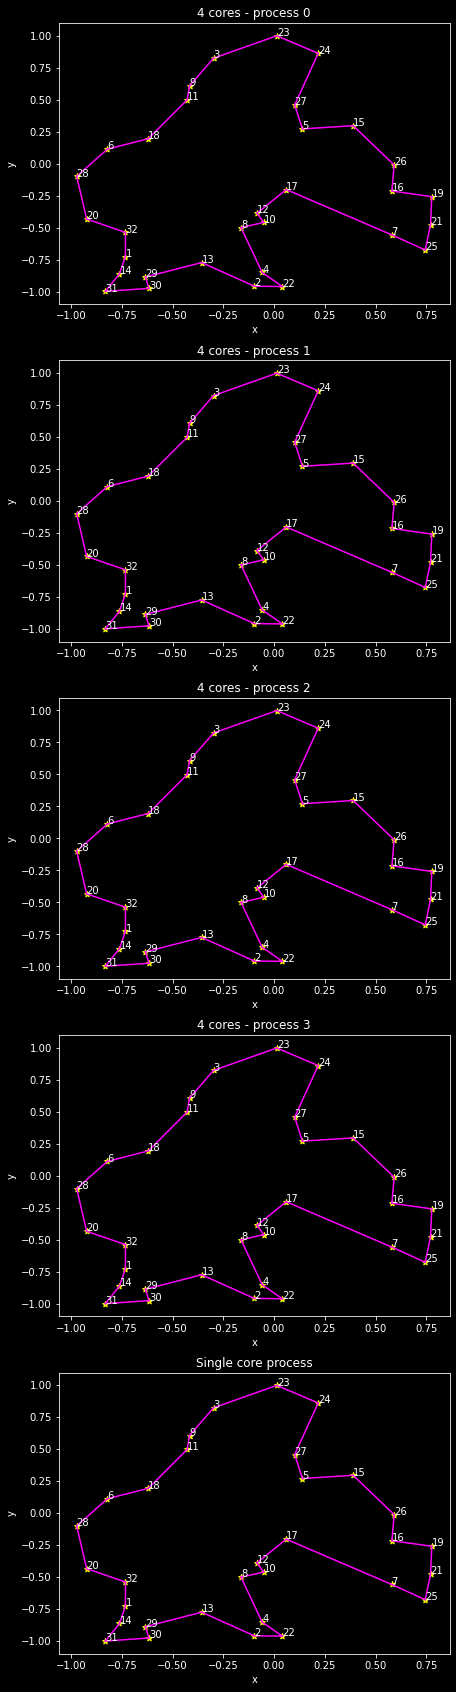

In [18]:
# plot the best path found by each core

fig, axx = plt.subplots(len(cores), 1, figsize=(7,30))
    
for core in cores:
    ax = axx[core]
    ax.scatter(x=pos_x, y=pos_y, color='yellow', marker='*')
    for i in range(cities):
        ax.annotate(str(i+1), positions[i])
    opt_path = np.genfromtxt("best_cromo"+str(core)+".csv", dtype=int, delimiter=',')[-1]
    for i in range(cities):
        x1 = pos_x[opt_path[i-cities*int(i/cities)]-1]
        y1 = pos_y[opt_path[i-cities*int(i/cities)]-1]
        x2 = pos_x[opt_path[i+1-cities*int((i+1)/cities)]-1]
        y2 = pos_y[opt_path[i+1-cities*int((i+1)/cities)]-1]
        ax.plot([x1, x2], [y1, y2], color='fuchsia')
    if core == 4:
        label = "Single core process"
    else:
        label = f"4 cores - process {core}"
    ax.set_title(label)
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    print('\n',label, "\n\toptimal path =",opt_path)

The first plot shows the length of the best path as a function of the generations perfomed, both for each of the 4 cores and for the case run with a single core. It is clear that both the 4 cores and the single core reach the same best chromosome, but the 4 core case is much faster in doing so, needing less than 200 generations, while the single core needs about 500.
    
What we gain in using different connected continents is therefore rapidity of convergence.
    
The 5 plots below show the final best path and that is clearly a good path since there are no intersections. It is the same path for both the 4 cores and the single core, as we were able say by looking at the best path length plot.